<a href="https://colab.research.google.com/github/Saifullah785/Agentic_AI_LangGraph_Learning_Journey/blob/main/Sequential_Workflows_in_LangGraph/simple_LLM_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install langgraph langchain_openai langchain_community

In [12]:
# Import necessary libraries
from langgraph.graph import StateGraph, START, END
from langchain.chat_models import ChatOpenAI # This line was added
from typing import TypedDict
import os


In [13]:
# Load the OpenAI API key from the secrets manager
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Initialize the ChatOpenAI model
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY)

In [4]:
# Define the state structure for the graph
# create a state
class LLMState(TypedDict):
    question: str
    answer: str

In [5]:
# Define the LLM question answering node
def llm_qa(state: LLMState) -> LLMState:

    question = state['question']

    prompt = f"Answer the question: {question}"

    answer = model.invoke(prompt).content

    state['answer'] = answer

    return state

In [6]:
# Create and compile the StateGraph
# Create our Graph

graph = StateGraph(LLMState)

# add nodes and edges
graph.add_node('llm_qa', llm_qa)

graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()

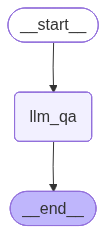

In [8]:
graph.compile()

In [9]:
# Execute the workflow with an initial question
# execute

intial_state = {'question': 'why people mindset is distracted Not growing in life?'}

final_state = workflow.invoke(intial_state)

print(final_state['answer'])

There are several reasons why someone's mindset may be distracted and not growing in life. These reasons can include:

1. Lack of focus and discipline: Without a clear sense of direction or goals, it can be easy to become distracted and lose motivation to grow and improve.

2. Fear of failure or rejection: Some people may be afraid to take risks or step out of their comfort zone, which can hold them back from reaching their full potential.

3. Negative self-talk and limiting beliefs: If someone constantly doubts themselves or believes they are not capable of success, it can hinder their growth and prevent them from taking the necessary steps to move forward.

4. External influences: Surrounding oneself with negative or unsupportive people can also impact one's mindset and prevent them from growing in life.

Overall, a distracted mindset can stem from a variety of internal and external factors that need to be addressed in order to foster personal growth and development.


In [10]:
# Example of invoking the model directly
model.invoke("What is the meaning of life?").content

'The meaning of life is a philosophical question that has been debated for centuries. Different people and cultures have different beliefs and perspectives on the meaning of life. Some believe that the meaning of life is to seek happiness and fulfillment, others believe it is to serve a higher power or follow a set of moral principles. Ultimately, the meaning of life is a deeply personal and subjective question that each individual must explore and define for themselves.'